# Available Listings and Average Price of Listings in City Choices

#### Import dependencies and establish csv file connections

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pathlib
import json
import pandas as pd
import csv
from pathlib import Path
from scipy.stats import linregress

inventory_count_listings_load = pd.read_csv("count_of_listings.csv")
average_list_price_load = pd.read_csv("average_list_price.csv")

inventory_count_listings_load.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,102001,0,United States,country,NaN,1421529.0,1500193.0,1592414.0,1660614.0,1709142.0,...,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884129.0,830977.0,835420.0,845310.0
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0,42796.0,43253.0,44167.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767.0,15382.0,15214.0,15090.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48985.0,...,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0,20829.0,20922.0,21201.0
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0,17106.0,17053.0,17942.0


#### View first five rows of csv file

In [2]:
average_list_price_load.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,102001,0,United States,country,NaN,263267.0,271267.0,276633.0,280000.0,280300.0,...,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0,371900.0,374833.0,383166.0
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,...,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0,624667.0,634967.0,647967.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,...,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882633.0,885967.0,892967.0,916231.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,...,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0,302167.0,308833.0,319133.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,...,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0,396667.0,400000.0,411663.0


#### Merge both csv files into single dataset

In [3]:
housing_data_complete = pd.merge(inventory_count_listings_load, average_list_price_load, how="outer", on=['RegionID','RegionID'])

housing_data_complete.head()

,RegionID,SizeRank_x,RegionName_x,RegionType_x,StateName_x,2018-03-31_x,2018-04-30_x,2018-05-31_x,2018-06-30_x,2018-07-31_x,...,2022-07-31_y,2022-08-31_y,2022-09-30_y,2022-10-31_y,2022-11-30_y,2022-12-31_y,2023-01-31_y,2023-02-28_y,2023-03-31_y,2023-04-30_y
0,102001,0,United States,country,NaN,1421529.0,1500193.0,1592414.0,1660614.0,1709142.0,...,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0,371900.0,374833.0,383166.0
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0,624667.0,634967.0,647967.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882633.0,885967.0,892967.0,916231.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48985.0,...,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0,302167.0,308833.0,319133.0
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0,396667.0,400000.0,411663.0


#### Establish Groupby

In [4]:
cities = housing_data_complete.set_index('RegionName_x').groupby(['RegionName_x'])
cities

#### View cities head

In [5]:
cities.head()

,RegionID,SizeRank_x,RegionType_x,StateName_x,2018-03-31_x,2018-04-30_x,2018-05-31_x,2018-06-30_x,2018-07-31_x,2018-08-31_x,...,2022-07-31_y,2022-08-31_y,2022-09-30_y,2022-10-31_y,2022-11-30_y,2022-12-31_y,2023-01-31_y,2023-02-28_y,2023-03-31_y,2023-04-30_y
RegionName_x,,,,,,,,,,,,,,,,,,,,,
United States,102001,0,country,NaN,1421529.0,1500193.0,1592414.0,1660614.0,1709142.0,1733388.0,...,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0,371900.0,374833.0,383166.0
"New York, NY",394913,1,msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,91251.0,...,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0,624667.0,634967.0,647967.0
"Los Angeles, CA",753899,2,msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,29874.0,...,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882633.0,885967.0,892967.0,916231.0
"Chicago, IL",394463,3,msa,IL,38581.0,42253.0,45757.0,47492.0,48985.0,49782.0,...,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0,302167.0,308833.0,319133.0
"Dallas, TX",394514,4,msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,33567.0,...,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0,396667.0,400000.0,411663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zapata, TX",753929,935,msa,TX,55.0,55.0,56.0,66.0,65.0,62.0,...,136667.0,142667.0,144333.0,149250.0,153150.0,154983.0,153567.0,148000.0,146833.0,147467.0
"Ketchikan, AK",394743,936,msa,AK,77.0,78.0,80.0,92.0,104.0,115.0,...,380167.0,419000.0,419000.0,429917.0,416833.0,425333.0,415417.0,397833.0,406333.0,422000.0
"Craig, CO",753874,937,msa,CO,115.0,116.0,126.0,148.0,165.0,175.0,...,355767.0,354083.0,359917.0,368250.0,375733.0,373233.0,374933.0,371617.0,355817.0,337483.0


#### View LA row for review

In [6]:
LA = housing_data_complete[(housing_data_complete["RegionName_x"] == "Los Angeles, CA")]
LA.head()


,RegionID,SizeRank_x,RegionName_x,RegionType_x,StateName_x,2018-03-31_x,2018-04-30_x,2018-05-31_x,2018-06-30_x,2018-07-31_x,...,2022-07-31_y,2022-08-31_y,2022-09-30_y,2022-10-31_y,2022-11-30_y,2022-12-31_y,2023-01-31_y,2023-02-28_y,2023-03-31_y,2023-04-30_y
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882633.0,885967.0,892967.0,916231.0


#### Select only Cities, Available_Listings, and Average_Price

In [7]:
cities_info = pd.DataFrame({
    "Cities": housing_data_complete["RegionName_x"],
    "Available_Listings": housing_data_complete["2023-04-30_x"],
    "Average_Price": housing_data_complete["2023-04-30_y"]
    })

cities_info.head()

,Cities,Available_Listings,Average_Price
0,United States,845310.0,383166.0
1,"New York, NY",44167.0,647967.0
2,"Los Angeles, CA",15090.0,916231.0
3,"Chicago, IL",21201.0,319133.0
4,"Dallas, TX",17942.0,411663.0


#### View head

In [8]:
top_five_cities = cities_info[cities_info['Cities'].isin(['Los Angeles, CA','Miami, FL','Las Vegas, NV','Houston, TX','Phoenix, AZ'])]
top_five_cities.head()

,Cities,Available_Listings,Average_Price
2,"Los Angeles, CA",15090.0,916231.0
5,"Houston, TX",20845.0,351567.0
8,"Miami, FL",33623.0,544967.0
11,"Phoenix, AZ",19428.0,482267.0
30,"Las Vegas, NV",9094.0,439000.0


#### Format results

In [9]:
top_five_cities["Available_Listings"] = top_five_cities["Available_Listings"].astype(int)
top_five_cities["Average_Price"] = top_five_cities["Average_Price"].astype(float).round(decimals=0)
top_five_cities

C:\Users\bosto\AppData\Local\Temp\ipykernel_18952\1995365227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_cities["Available_Listings"] = top_five_cities["Available_Listings"].astype(int)
C:\Users\bosto\AppData\Local\Temp\ipykernel_18952\1995365227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_cities["Average_Price"] = top_five_cities["Average_Price"].astype(float).round(decimals=0)


,Cities,Available_Listings,Average_Price
2,"Los Angeles, CA",15090,916231.0
5,"Houston, TX",20845,351567.0
8,"Miami, FL",33623,544967.0
11,"Phoenix, AZ",19428,482267.0
30,"Las Vegas, NV",9094,439000.0


In [10]:
top_five_cities["Average_Price"] = top_five_cities["Average_Price"].map("${:,.2f}".format)
top_five_cities["Available_Listings"] = top_five_cities["Available_Listings"].map("{:,.0f}".format)
top_five_cities

C:\Users\bosto\AppData\Local\Temp\ipykernel_18952\2549374224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_cities["Average_Price"] = top_five_cities["Average_Price"].map("${:,.2f}".format)
C:\Users\bosto\AppData\Local\Temp\ipykernel_18952\2549374224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_cities["Available_Listings"] = top_five_cities["Available_Listings"].map("{:,.0f}".format)


,Cities,Available_Listings,Average_Price
2,"Los Angeles, CA","15,090","$916,231.00"
5,"Houston, TX","20,845","$351,567.00"
8,"Miami, FL","33,623","$544,967.00"
11,"Phoenix, AZ","19,428","$482,267.00"
30,"Las Vegas, NV","9,094","$439,000.00"


#### Create visual for available listings

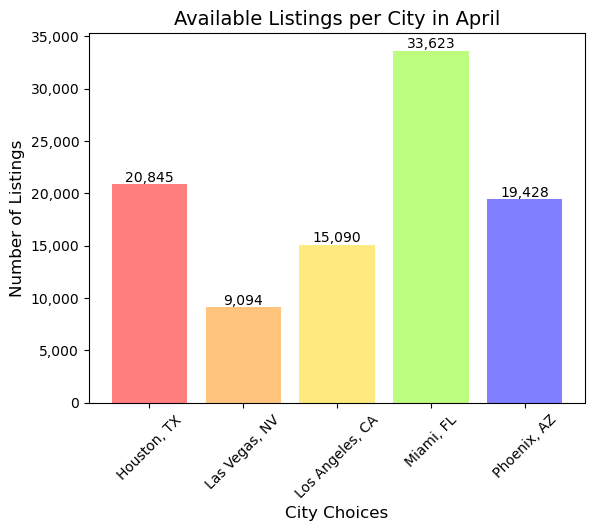

In [11]:
top5cities = {
    'City': ['Houston, TX','Las Vegas, NV','Los Angeles, CA','Miami, FL','Phoenix, AZ'],
    'Available Listings':[20845,9094,15090,33623,19428],
    'Average Listing Price':[351567,439000,916231,544967,482267]}

colors = ['red','darkorange','gold','lawngreen','blue']
    
x_axis = np.arange(len(top5cities['City']))

plt.title('Available Listings per City in April', fontsize=14)
plt.bar(top5cities['City'], top5cities['Available Listings'], color=colors, alpha=0.5,align="center")
plt.xticks(x_axis, top5cities['City'], rotation=45)
plt.gca().get_yaxis().set_major_formatter('{x:,.0f}')
plt.xlabel('City Choices', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

for i, price in enumerate(top5cities['Available Listings']):
    plt.text(i, price, '{:,.0f}'.format(price), ha='center', va='bottom')

plt.show()

#### Create visual for average price of listing

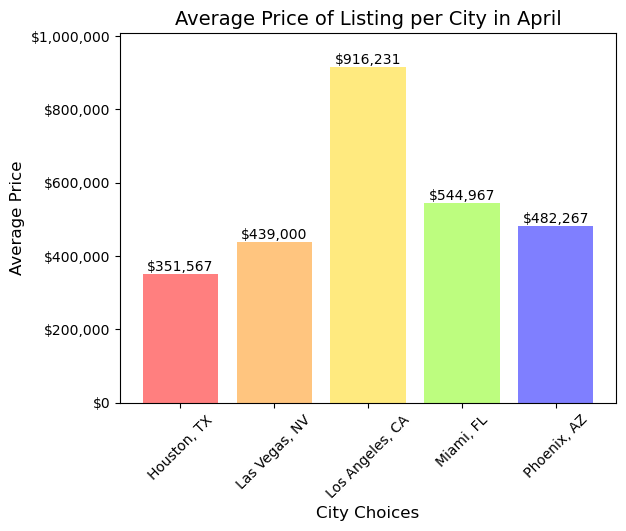

In [12]:
x_axis = np.arange(len(top5cities['City']))

plt.title('Average Price of Listing per City in April', fontsize=14)
plt.bar(top5cities['City'], top5cities['Average Listing Price'], color=colors, alpha=0.5,align="center")
plt.xticks(x_axis, top5cities['City'], rotation=45)
plt.ylim(0, max(top5cities['Average Listing Price']) * 1.1)
plt.gca().get_yaxis().set_major_formatter('${x:,.0f}')
plt.xlabel('City Choices', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

for i, price in enumerate(top5cities['Average Listing Price']):
    plt.text(i, price, '${:,.0f}'.format(price), ha='center', va='bottom')

plt.show()